In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
from sklearn.pipeline import Pipeline

In [21]:
def poly_regression(degree):
    # Generate clean quadratic data
    X = np.linspace(-3, 3, 200).reshape(-1, 1)
    Y = 0.5 * X**2 + 1.5 * X + 2

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Create pipeline with polynomial transformation and linear regression
    model = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree)),
        ("linear_regression", LinearRegression())
    ])

    # Fit the model
    model.fit(X_train, Y_train)

    # Predict on test set and the full range
    y_pred_linear = model.predict(X_test)
    y_pred_poly = model.predict(X) #Here predicting with just X and not X_train because X already has a smooth curve

    # Calculate R² score
    r2 = r2_score(Y_test, y_pred_linear)
    print(f"R² Score (degree={degree}): {r2*100:.4f}%")

    plt.figure(figsize=(10, 6))
    plt.plot(X, y_pred_poly, 'r-', linewidth=2, label=f'Degree {degree}')
    plt.scatter(X_train, Y_train, color='blue', label='Train')
    plt.scatter(X_test, Y_test, color='green', label='Test')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.legend()
    plt.grid(True)
    plt.show()

R² Score (degree=2): 100.0000%


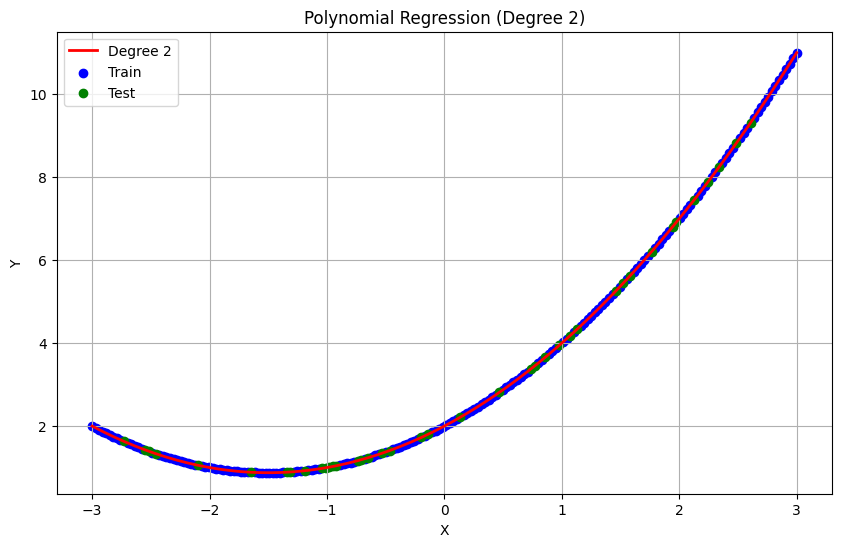

In [22]:
poly_regression(2)

R² Score (degree=4): 100.0000%


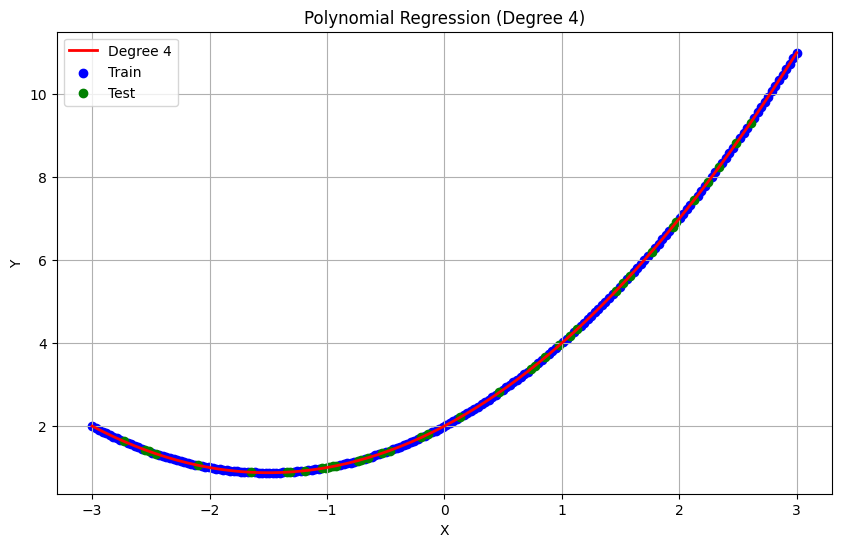

In [23]:
poly_regression(4)

R² Score (degree=30): 92.8178%


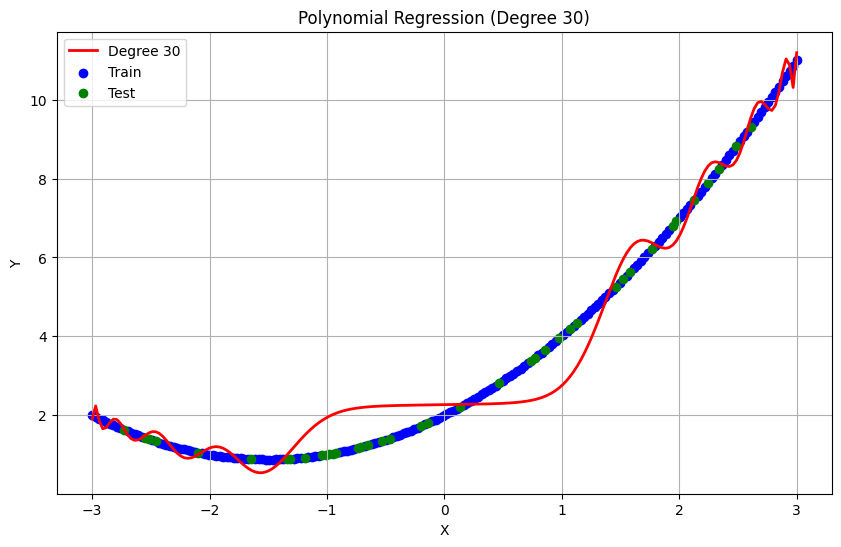

In [24]:
poly_regression(30)

R² Score (degree=40): 65.3902%


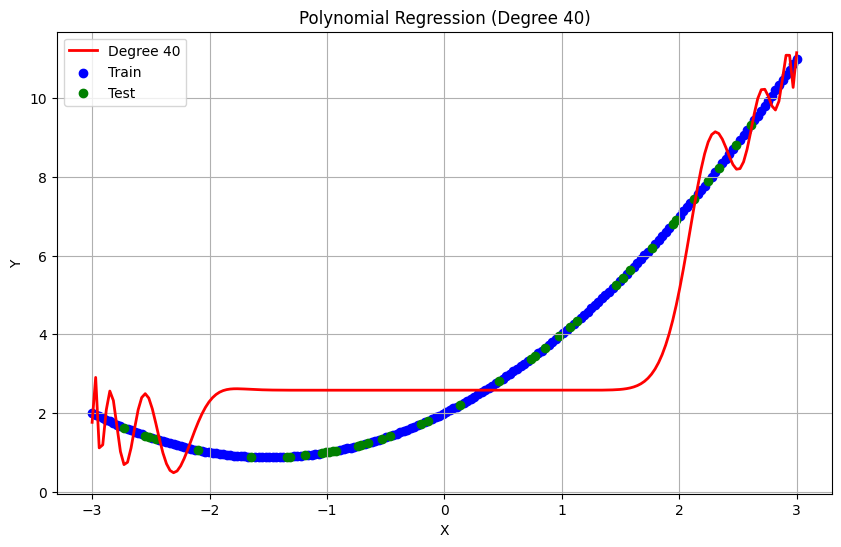

In [25]:
poly_regression(40)